# The vector function $\mathbf{G}$

We begin by importing some stuff and defining our functions:

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import sympy
from sympy import *

# Initialize the session
init_session(quiet=True)

# I am using the dev version of sympy
print("Using sympy version", sympy.__version__)

# Define our symbols
x, y, z, mu, nu, l, m = symbols('x y z mu nu l m')
z = sqrt(1 - x ** 2 - y ** 2)
from sympy.vector import CoordSys3D
N = CoordSys3D('N')


Using sympy version 1.1.2.dev


## The exterior derivative

We're going to use `sympy` to take some derivatives. Note that I'm using the `dev` version of the package to get nice $\LaTeX$ rendering in this notebook.

Let's begin by defining the exterior derivative operation, 
$D\, \hat{}\, G = \frac{\mathrm{d} G_y}{\mathrm{d} x} - \frac{\mathrm{d} G_x}{\mathrm{d} y}$:

In [2]:
def ExteriorDerivative(F):
    """Return the exterior derivative of the vector function F."""
    return simplify(diff(F.dot(N.j), x) - diff(F.dot(N.i), y))

Now we will show that the exterior derivative of the vector function $\mathbf{G}_n(x, y)$ is equal to the $n^\mathrm{th}$ component of the Green's basis, $\tilde{g}_n$. There are four cases, depending on the values of $\mu$, $\nu$, $l$ and $m$.

## Case 1: $\nu$ even

Our function is $\mathbf{G} = x^\frac{\mu+2}{2} y^\frac{\nu}{2} \hat{\mathbf{y}}$:

In [3]:
G = x ** ((mu + 2) / 2) * y ** (nu / 2) * N.j

In [4]:
G

Its exterior derivative is 

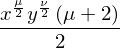

In [5]:
ExteriorDerivative(G)

which is case 1 in Equation (11).

## Case 2: $\nu = \mu = 1$

Our function is $\mathbf{G} = \frac{1-z^3}{3(1-z^2)}(-y\, \hat{\mathbf{x}} + x\, \hat{\mathbf{y}})$:

In [6]:
G = (1 - z ** 3) / (3 * (1 - z ** 2)) * (-y * N.i + x * N.j)

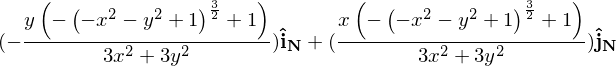

In [7]:
G

Its exterior derivative is 

In [8]:
ExteriorDerivative(G)

which is just equal to $z$ (case 2 in Equation 11).

## Case 3: $\nu$ odd, $\mu = 1$, $l$ even

Our function is $\mathbf{G} = x^{l-2}z^3\, \mathbf{\hat{x}}$:

In [9]:
G = x ** (l - 2) * z ** 3 * N.i

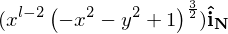

In [10]:
G

Its exterior derivative is

In [11]:
ExteriorDerivative(G)

which is case 3 in Equation (11).

## Case 4: $\nu$ odd, $\mu = 1$, $l$ odd

Our function is $\mathbf{G} = x^{l-3}yz^3\, \mathbf{\hat{x}}$:

In [12]:
G = x ** (l - 3) * y * z ** 3 * N.i

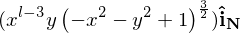

In [13]:
G

Its exterior derivative is

In [14]:
ExteriorDerivative(G)

which (after some rearranging) is equal to case 4 in Equation (11).

## All other cases

Our function is $\mathbf{G} = x^\frac{\mu-3}{2}y^\frac{\nu-1}{2}z^3\, \mathbf{\hat{y}}$:

In [15]:
G = x ** ((mu - 3) / 2) * y ** ((nu - 1) / 2) * z ** 3 * N.j

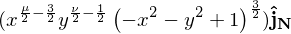

In [16]:
G

Its exterior derivative is

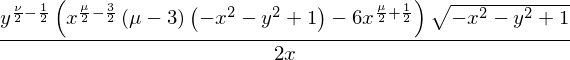

In [17]:
ExteriorDerivative(G)

It may be difficult to tell, but this is equal to the last case in Equation (11). Here's the difference between what we get and the term in Equation (11):

In [18]:
simplify(ExteriorDerivative(G) - z * ((mu - 3) / 2 * x ** ((mu - 5) / 2) * y ** ((nu - 1) / 2) - (mu - 3) / 2 * x ** ((mu - 5) / 2) * y ** ((nu + 3) / 2) - (mu + 3) / 2 * x ** ((mu - 1) / 2) * y ** ((nu - 1) / 2)))